# 第4章 便捷函数

本章涵盖以下内容：
- 数据选取；
- 简单数据分析；
- 收益率相关性；
- 多项式；
- 线性代数的计算函数。

## 4.1 相关性

　　不知你是否注意过这样的现象：某公司的股价被另外一家公司的股价紧紧跟随，并且它们通常是同领域的竞争对手。对于这种现象，理论上的解释是：因为这两家公司经营的业务类型相同，它们面临同样的挑战，需要相同的原料和资源，并且争夺同类型的客户。  
  
　　你可能会想到很多这样的例子，但还想检验一下它们是否真的存在关联。一种方法就是看看两个公司股票收益率的相关性，强相关性意味着它们之间存在一定的关联性。当然，这不是严格的证明，特别是当我们所用的数据不够充足时。

## 4.2 动手实践：股票相关性分析

　　在本节的教程中，我们将使用2个示例数据集提供收盘价数据，其中包含收盘价的最小值。
第一家公司是BHP Billiton（BHP），其主要业务是石油、金属和钻石的开采。第二家公司是Vale
（VALE），也是一家金属开采业的公司。因此，这两家公司有部分业务是重合的，尽管不是100%
相同。按照如下步骤分析它们股票的相关性。  

(1) 首先，从CSV文件（本章示例代码文件夹中）中读入两只股票的收盘价数据，并计算收益率。如果你不记得该怎样做，在前一章中有很多可以参阅的例子。

(2) 协方差描述的是两个变量共同变化的趋势，其实就是归一化前的相关系数。使用cov函
数计算股票收益率的协方差矩阵（并非必须这样做，但我们可以据此展示一些矩阵操作的方法）。

In [32]:
covariance = np.cov(bhp_returns, vale_returns)
print("Covariance", covariance)

Covariance [[ 0.00028179  0.00019766]
 [ 0.00019766  0.00030123]]


(3) 使用diagonal函数查看对角线上的元素：

In [33]:
print("Covariance diagonal", covariance.diagonal())

Covariance diagonal [ 0.00028179  0.00030123]


(4) 使用trace函数计算矩阵的迹，即对角线上元素之和：

In [34]:
print("Covariance trace", covariance.trace())

Covariance trace 0.00058302354992


(5) 两个向量的相关系数被定义为协方差除以各自标准差的乘积。计算向量 a 和 b 的相关系数的公式如下。
$$corr(a,b) = \frac{cov(a,b)}{\sigma_{a}\sigma_{b}}$$

In [35]:
print(covariance / (bhp_returns.std() * vale_returns.std()))

[[ 1.00173366  0.70264666]
 [ 0.70264666  1.0708476 ]]


(6) 我们将用相关系数来度量这两只股票的相关程度。相关系数的取值范围在-1到1之间。根据定义，一组数值与自身的相关系数等于1。这是严格线性关系的理想值，实际上如果得到稍小一些的值，我们仍然会很高兴。使用corrcoef函数计算相关系数（或者更精确地，相关系数矩阵）：

In [37]:
print("Correlation coefficient", np.corrcoef(bhp_returns, vale_returns))

Correlation coefficient [[ 1.          0.67841747]
 [ 0.67841747  1.        ]]


　　对角线上的元素即BHP和VALE与自身的相关系数，因此均为1，很可能并非真的经过计算得出。相关系数矩阵是关于对角线对称的，因此另外两个元素的值相等，表示BHP与VALE的相关系数等于VALE和BHP的相关系数。看起来它们的相关程度似乎不是很强。

(7) 另外一个要点是判断两只股票的价格走势是否同步。如果它们的差值偏离了平均差值2倍于标准差的距离，则认为这两只股票走势不同步。

Covariance [[ 0.00028179  0.00019766]
 [ 0.00019766  0.00030123]]
[[ 1.00173366  0.70264666]
 [ 0.70264666  1.0708476 ]]
Correlation coefficient [[ 1.          0.67841747]
 [ 0.67841747  1.        ]]
Out of sync False


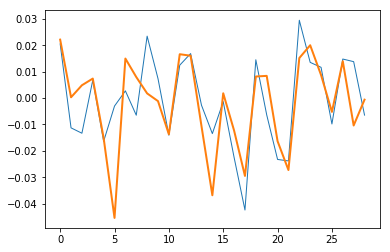

In [31]:
import numpy as np
import matplotlib.pyplot as plt

bhp = np.loadtxt('./Data/BHP.csv', delimiter=',', usecols=(6,), unpack=True)
bhp_returns = np.diff(bhp) / bhp[:-1]

vale = np.loadtxt('./Data/VALE.csv', delimiter=',', usecols=(6,), unpack=True)
vale_returns = np.diff(vale) / vale[:-1]

covariance = np.cov(bhp_returns, vale_returns)
print("Covariance", covariance)

print(covariance / (bhp_returns.std() * vale_returns.std()))

print("Correlation coefficient", np.corrcoef(bhp_returns, vale_returns))

difference = bhp - vale
avg = np.mean(difference)
dev = np.std(difference)

print("Out of sync", np.abs(difference[-1] - avg) > 2 * dev)

t = np.arange(len(bhp_returns))

plt.plot(t, bhp_returns, lw=1)
plt.plot(t, vale_returns, lw=2)
plt.show()

## 4.3 多项式

## 4.4 动手实践：多项式拟合

Polynomial fit [  1.11655581e-03  -5.28581762e-02   5.80684638e-01   5.79791202e+01]
Next value 57.9743076081
Roots [ 35.48624287+30.62717062j  35.48624287-30.62717062j -23.63210575 +0.j        ]
Derivative [ 0.00334967 -0.10571635  0.58068464]
Extremas [ 24.47820054   7.08205278]
7
24


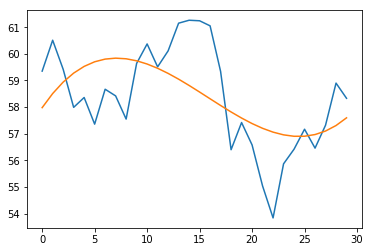

In [10]:
import numpy as np
import sys
import matplotlib.pyplot as plt

bhp = np.loadtxt('./Data/BHP.csv', delimiter=',', usecols=(6,), unpack=True)
vale = np.loadtxt('./Data/VALE.csv', delimiter=',', usecols=(6,), unpack=True)

t = np.arange(len(bhp))
poly = np.polyfit(t, bhp - vale, deg=3) # deg为拟合多项式的次数

print("Polynomial fit", poly)
print("Next value", np.polyval(poly, t[-1] + 1))
print("Roots", np.roots(poly))

der = np.polyder(poly)

print("Derivative", der)
print("Extremas", np.roots(der))

vals = np.polyval(poly, t)

print(np.argmax(vals))
print(np.argmin(vals))

plt.plot(t, bhp - vale)
plt.plot(t, vals)
plt.show()

In [9]:
poly

array([  1.11655581e-03,  -5.28581762e-02,   5.80684638e-01,
         5.79791202e+01])

In [13]:
bhp

array([ 93.72,  95.64,  94.56,  93.3 ,  93.93,  92.39,  92.11,  92.36,
        91.76,  93.91,  94.6 ,  93.27,  94.43,  96.02,  95.76,  94.47,
        94.34,  92.22,  88.31,  89.59,  89.02,  86.95,  84.88,  87.38,
        88.56,  89.59,  88.71,  90.02,  91.26,  90.67])

In [14]:
t

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [15]:
bhp - vale

array([ 59.35,  60.51,  59.42,  57.99,  58.36,  57.36,  58.67,  58.42,
        57.55,  59.64,  60.37,  59.51,  60.11,  61.15,  61.26,  61.24,
        61.05,  59.34,  56.4 ,  57.42,  56.58,  55.04,  53.84,  55.87,
        56.42,  57.17,  56.46,  57.32,  58.9 ,  58.33])

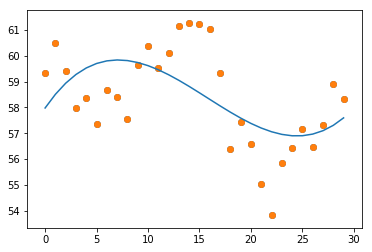

In [18]:
plt.scatter(t, bhp - vale)
plt.plot(t, np.polyval(poly, t))
plt.show()

## 4.5 净额成交量

## 4.6 动手实践：计算 OBV

(1) 把BHP数据分别加载到收盘价和成交量的数组中：

In [19]:
c, v = np.loadtxt('./Data/BHP.csv', delimiter=',', usecols=(6,7), unpack=True)

In [20]:
c

array([ 93.72,  95.64,  94.56,  93.3 ,  93.93,  92.39,  92.11,  92.36,
        91.76,  93.91,  94.6 ,  93.27,  94.43,  96.02,  95.76,  94.47,
        94.34,  92.22,  88.31,  89.59,  89.02,  86.95,  84.88,  87.38,
        88.56,  89.59,  88.71,  90.02,  91.26,  90.67])

In [25]:
change = np.diff(c)
print("Change", change)

Change [ 1.92 -1.08 -1.26  0.63 -1.54 -0.28  0.25 -0.6   2.15  0.69 -1.33  1.16
  1.59 -0.26 -1.29 -0.13 -2.12 -3.91  1.28 -0.57 -2.07 -2.07  2.5   1.18
  1.03 -0.88  1.31  1.24 -0.59]


(2) NumPy中的sign函数可以返回数组中每个元素的正负符号，数组元素为负时返回-1，为
正时返回1，否则返回0。对change数组使用sign函数：`

In [26]:
signs = np.sign(change)
print("Signs", signs)

Signs [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]


另外，我们也可以使用piecewise函数来获取数组元素的正负。顾名思义， piecewise函数可以分段给定取值。使用合适的返回值和对应的条件调用该函数：

In [27]:
pieces = np.piecewise(change, [change < 0, change > 0], [-1, 1])
print("Pieces", pieces)

Pieces [ 1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1. -1. -1.
  1. -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.]


检查两次的输出是否一致：

In [28]:
print("Arrays equal?", np.array_equal(signs, pieces))

Arrays equal? True


(3) OBV值的计算依赖于前一日的收盘价，所以在我们的例子中无法计算首日的OBV值：

In [29]:
print("On balance volume", v[1:] * signs)

On balance volume [ 2620800. -2461300. -3270900.  2650200. -4667300. -5359800.  7768400.
 -4799100.  3448300.  4719800. -3898900.  3727700.  3379400. -2463900.
 -3590900. -3805000. -3271700. -5507800.  2996800. -3434800. -5008300.
 -7809799.  3947100.  3809700.  3098200. -3500200.  4285600.  3918800.
 -3632200.]


## 4.7 交易过程模拟

## 4.8 动手实践：避免使用循环